# Step 0 : Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skl
import seaborn as sns

### Let Malignant Cancer = 1
### Let Benign Cancer = -1

# Step 1: Data pre-processing

In [118]:
df = pd.read_csv('data_breast_cancer.csv')
df = df.drop(axis=1, columns=['Unnamed: 32', 'id'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [119]:
df["diagnosis"] = df["diagnosis"].replace("M", 1).replace("B", -1)
X_data = df.iloc[:,2:]
y_data = df['diagnosis']

In [120]:
### Splitting the data into training and testing sets

In [121]:
X_train, X_test, y_train, y_test = skl.train_test_split(X_data, y_data, random_state=42, test_size=0.33)

# Step 2: Data visualization

In [122]:
scatter_matrix = X_train
scatter_matrix.insert(0, "diagnosis", y_train)

In [123]:
X_train = X_train.drop(axis=1, columns='diagnosis')
X_train.head()

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,0.4209,...,18.79,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100
407,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,0.4993,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
56,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,0.7275,...,26.14,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294
497,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,0.1532,...,14.06,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661
301,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,0.3642,...,13.46,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764


C:\Users\qasim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\qasim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


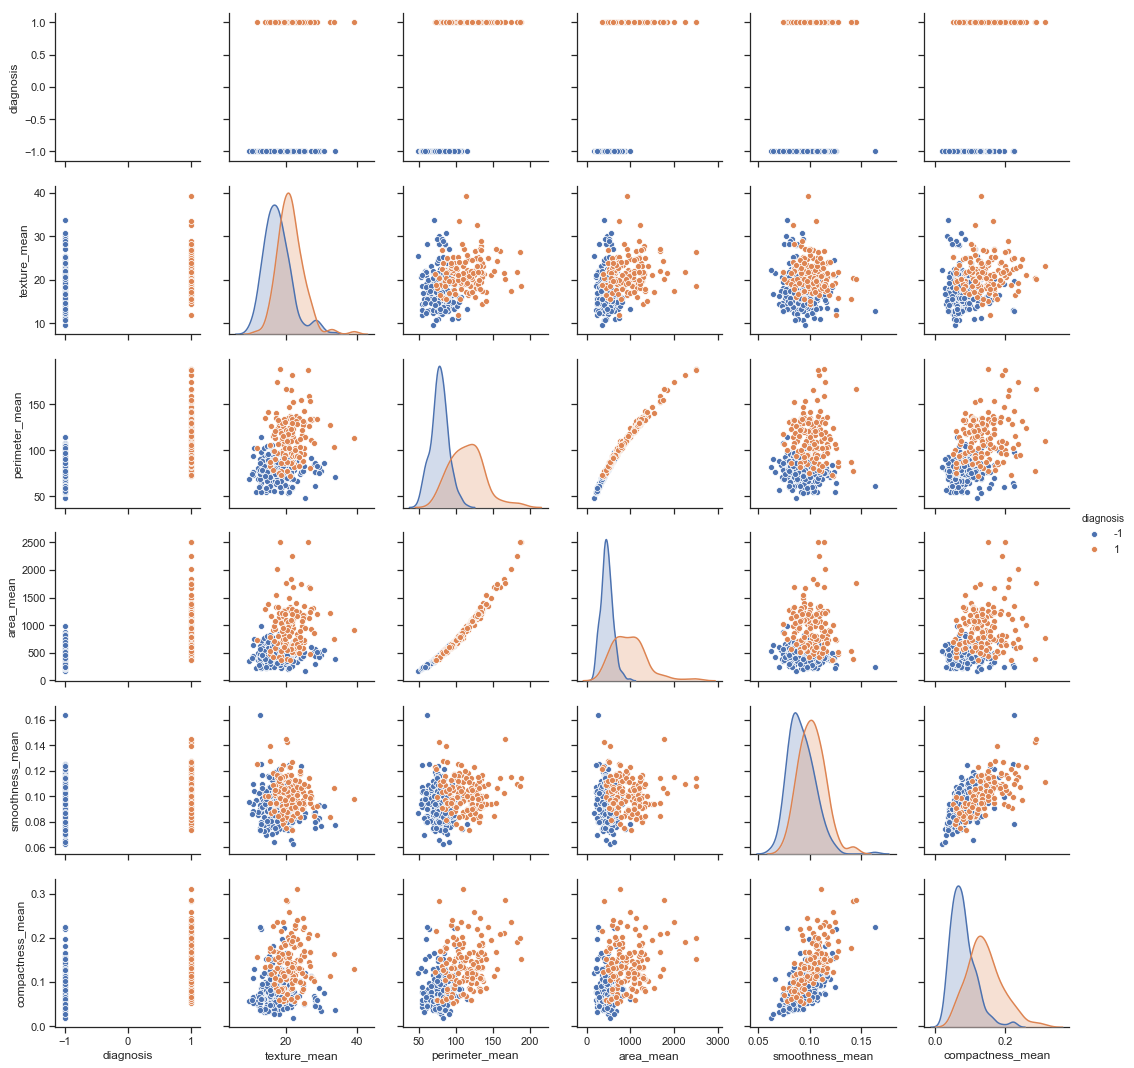

In [124]:
sns.set(style="ticks")
sns.pairplot(scatter_matrix.iloc[:,:6],hue="diagnosis")
sns.set(rc={'figure.figsize':(15,20)}) 

### Scatter matrix for only the first six features (diagnosis is the hue characteristic)

In [125]:
### From the scatter plot above, it looks obvious that most of the variables are highly correlated
### All the 33 features weren't produced because it didn't fit the window screen. But based on tests, they all 
### exhibit highly correlated classified observations.

#### So, what could be the best approach to solve this?

#### Based on my current knowledge, either a perceptron, logistic regression, or a SVM.
#### Perceptron won't work because it's highly sensitive to outliers. So, let's go with SVM.
###### I'm not going with logit because I'm not 100% familiar with how to implement the probability distribution.
#####  Ps., I build my models from scratch :P

# Step 3: Building the SVM model

In [126]:
X_numpy_train = np.array(X_train.iloc[:])[:]
y_numpy_train = np.array(y_train[:])
X_numpy_test = np.array(X_test.iloc[:])[:]
y_numpy_test = np.array(y_test[:])

In [127]:
def sort_based_class(input_X, target_y):
    """
    Sorts Pandas Dataframe into classes.
    For example, 
    features = [...]
    classes = [-1, 1]
    
    sort_based_class(dataframe)
    returns sorted dataframe based on class order
    """
    benign_sorted = []
    melignant_sorted = []
    for (x,y) in zip(input_X, target_y):
        if(y == 1):
            melignant_sorted.append(x)
        else:
            benign_sorted.append(x)
    return benign_sorted, melignant_sorted

In [128]:
ben_X, mel_X = sort_based_class(X_numpy_train, y_numpy_train)

In [129]:
def euclid_distance_one_point(first_point, second_point):
    total_distance = 0
    for (p_0, p_1) in zip(first_point, second_point):
        total_distance += (p_0 - p_1)**2
    return total_distance**0.5

In [130]:
all_distances = []
for i in range(len(ben_X)):
    for j in range(len(mel_X)):
        one_distance = euclid_distance_one_point(ben_X[i], mel_X[j])
        all_distances.append((one_distance, i, j))

In [131]:
sorted_distance = sorted(all_distances,key=lambda x: x[0])

In [132]:
## This is the shorted distance between two points of two different classes (~13.03 units)
### This is when benign_X = 122 and melignant_X = 43
## Therefore, the two points are support vectors

In [133]:
sorted_distance[0]

(13.029066657442469, 122, 43)

###### equation of a hyperplane = w.T(X) + b = C

##### For support vectors, if class = -1, w.T(X) + b = -1  <-- H_0
#### if class = 1, w.T(X) + b = 1 <-- H_1

#### Therefore, finding the orthogonal projection will give us the optimal weights, w and slack variable, b
#### To find w and b, we need to use system of linear equations with H_0 and H_1

## Predicting:
###### if(w.T(X) + b >= 1):
###### class = +1
###### else:
###### class = -1

In [134]:
class_0 = -1
class_1 = 1
support_vector_1 = np.append(mel_X[43],1)
support_vector_0 = np.append(ben_X[122],1)

In [135]:
matrix = np.array([support_vector_0, support_vector_1])

In [136]:
coeffs = np.linalg.lstsq(matrix,[class_0, class_1])

C:\Users\qasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [137]:
coeffs[0].shape

(30,)

In [138]:
### The master algorithm:
# coeffs[0][:-1]@mel_X[i] + coeffs[0][-1]

In [139]:
def performance(X_input, y_target):
    melignant = []
    benign    = []
    misclassified = []
    
    for i in range(len(X_input)):
        hyperplane = coeffs[0][:-1]@X_input[i] + coeffs[0][-1]
        if(hyperplane >= 1 and y_target[i] == 1):
            # Class = Melignant
            melignant.append(hyperplane)
        elif(hyperplane <= -1 and y_target[i] == -1):
            # Class = benign
            benign.append(hyperplane)
        else:
            # Missclassified
            misclassified.append(hyperplane)          
    return benign, melignant, misclassified

In [140]:
b,m,mc = performance(X_numpy_train, y_numpy_train)

In [141]:
ben_test, mel_test = sort_based_class(X_numpy_train, y_numpy_train)

# Step 4 : Validating accuracy

In [142]:
### Training set accuracy:
b,m,mc = performance(X_numpy_train, y_numpy_train)
error = 1 - (len(mc)/len(X_numpy_train))

print(error) #<-- About 77% accurate

0.7664041994750657


In [143]:
### Testing set accuracy:
b,m,mc = performance(X_numpy_test, y_numpy_test)
error = 1 - (len(mc)/len(X_numpy_test))

print(error) #<-- About 79.3% accurate

0.7925531914893618


### Comparing Performance from my SVM vs. Scikit learn's SVM package

In [144]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_numpy_train, y_numpy_train)

y_pred = svclassifier.predict(X_numpy_test)

In [145]:
# Classification of SVM performance from sklearn report

In [146]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_numpy_test, y_pred))
print(classification_report(y_numpy_test, y_pred))

[[117   4]
 [  3  64]]
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       121
           1       0.94      0.96      0.95        67

   micro avg       0.96      0.96      0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



# Reflection:

### Overall, my model was not the most accurate (SVM from SKL has 97%).
### The reason for this was because I didn't incorporate any gradients. This would serve as the hyperparameter tuning f(x)

### In the near future, I'll introduce a tuning function to optimize the weights of my hyperplane

In [ ]:
## Peace out!